#Comunicación de resultados

In [0]:
# Importar las librerías que usaremos en el LAB

# %matplotlib notebook
%matplotlib inline
import pandas
import numpy
import seaborn
import statistics

import matplotlib.pyplot as plt
import scipy.stats as stats

In [51]:
# Dataset de la encuesta
dataset = pandas.read_csv('https://raw.githubusercontent.com/fpalaciosdrobins/diplodatos/master/responses.csv',encoding='utf8')
dataset[:3]

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats


In [52]:

lab2 = pandas.crosstab(index=dataset['Alcohol'].dropna(how='all'), columns=dataset['Smoking'].dropna(how='all'), margins=False, normalize=False)

lab2

Smoking,current smoker,former smoker,never smoked,tried smoking
Alcohol,,,,
drink a lot,78,55,15,72
never,11,11,61,39
social drinker,99,109,131,319


In [53]:
fumadores_bebedores = lab2["current smoker"]["drink a lot"] + lab2["current smoker"]["social drinker"] + lab2["tried smoking"]["drink a lot"] + lab2["tried smoking"]["social drinker"]
fumadores_bebedores

fumadores_no_bebedores = lab2["current smoker"]["never"] + lab2["tried smoking"]["never"] 
fumadores_no_bebedores

no_fumadores_bebedores = lab2["former smoker"]["drink a lot"] + lab2["former smoker"]["social drinker"] + lab2["never smoked"]["drink a lot"] + lab2["never smoked"]["social drinker"]
no_fumadores_bebedores

no_fumadores_no_bebedores = lab2["former smoker"]["never"] + lab2["never smoked"]["never"] 
no_fumadores_no_bebedores

array_fumadores = [fumadores_bebedores,no_fumadores_bebedores]

array_bebedores = [fumadores_no_bebedores,no_fumadores_no_bebedores]

array_lab2 = [array_fumadores,array_bebedores]

print (array_lab2)

[[568, 310], [50, 72]]


![texto alternativo](https://)

In [0]:
# Dataset con filtro de mujeres
dataset_mujeres = dataset.loc[dataset['Gender'] == 'female']

# Dataset con filtro de hombres
dataset_hombres = dataset.loc[dataset['Gender'] == 'male']






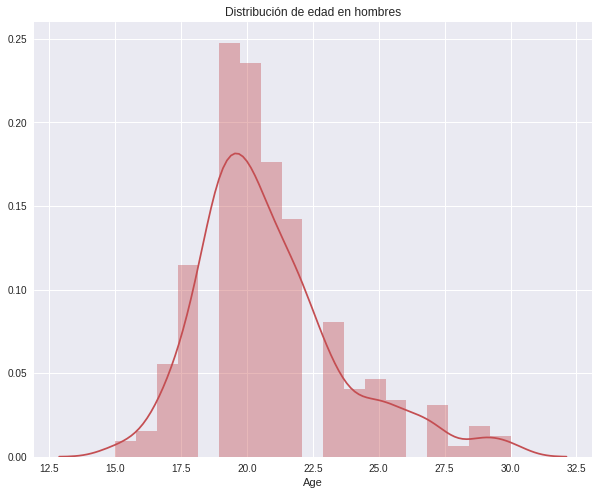

In [55]:
plt.figure(figsize=(10,8))
 
plt.title('Distribución de edad en hombres')

seaborn.set_color_codes()

seaborn.distplot(dataset_hombres.Age.dropna(axis=0, how='all'), color="r")

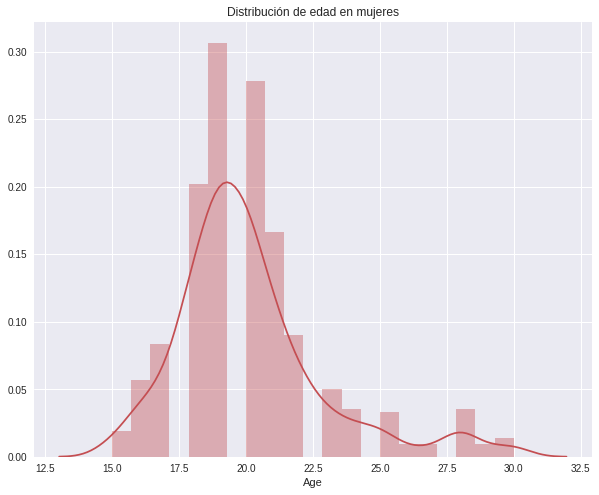

In [56]:
plt.figure(figsize=(10,8))
plt.title('Distribución de edad en mujeres')
seaborn.set_color_codes()

seaborn.distplot(dataset_mujeres.Age.dropna(axis=0, how='all'), color='r')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


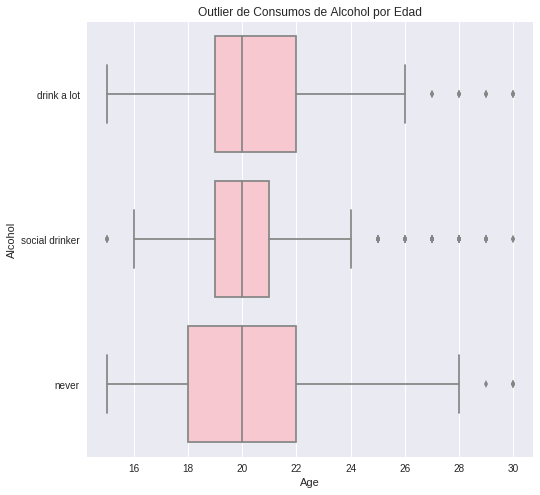

In [57]:

plt.figure(figsize=(8,8))
plt.title('Outlier de Consumos de Alcohol por Edad')
seaborn.boxplot(x="Age", y="Alcohol", data=dataset, color='pink')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


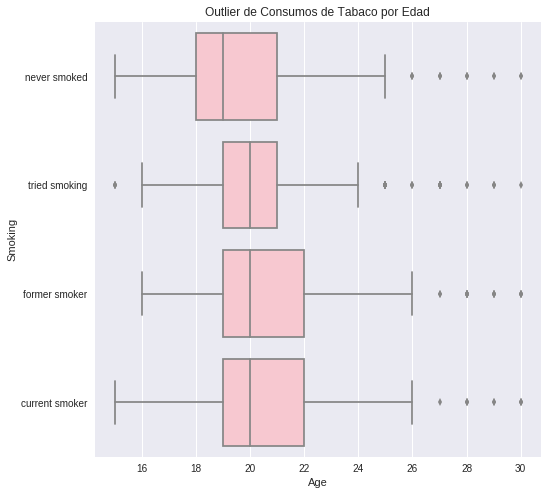

In [58]:
plt.figure(figsize=(8,8))
plt.title('Outlier de Consumos de Tabaco por Edad')
seaborn.boxplot(x="Age", y="Smoking", data=dataset, color='pink')

In [59]:
# Dataset reducido

dataset_reducido = dataset
dataset_reducido.loc[dataset_reducido.Alcohol == 'never' , 'Alcohol'] = 'No Bebedores'
dataset_reducido.loc[dataset_reducido.Alcohol == 'drink a lot' , 'Alcohol'] = 'Bebedores'
dataset_reducido.loc[dataset_reducido.Alcohol == 'social drinker', 'Alcohol'] = 'Bebedores'

dataset_reducido.loc[dataset_reducido.Smoking == 'never smoked' , 'Smoking'] = 'No Fumadores'
dataset_reducido.loc[dataset_reducido.Smoking == 'former smoker' , 'Smoking'] = 'No Fumadores'
dataset_reducido.loc[dataset_reducido.Smoking == 'tried smoking', 'Smoking'] = 'Fumadores'
dataset_reducido.loc[dataset_reducido.Smoking == 'current smoker', 'Smoking'] = 'Fumadores'

cross_reducido = pandas.crosstab(index=dataset_reducido['Alcohol'].dropna(how='all'), columns=dataset_reducido['Smoking'].dropna(how='all'), margins=True, normalize=False)

cross_reducido

Smoking,Fumadores,No Fumadores,All
Alcohol,,,
Bebedores,568,310,878
No Bebedores,50,72,122
All,618,382,1000


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


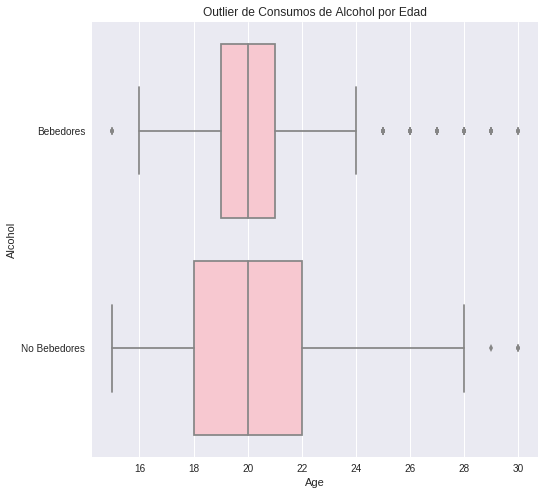

In [64]:
plt.figure(figsize=(8,8))
plt.title('Outlier de Consumos de Alcohol por Edad')
seaborn.boxplot(x="Age", y="Alcohol", data=dataset_reducido, color='pink',order=["Bebedores", "No Bebedores"])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


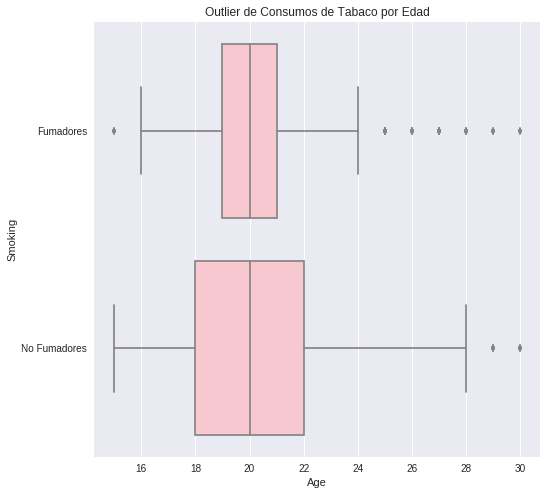

In [63]:
plt.figure(figsize=(8,8))
plt.title('Outlier de Consumos de Tabaco por Edad')
seaborn.boxplot(x="Age", y="Smoking", data=dataset_reducido, color='pink',order=["Fumadores", "No Fumadores"])

In [118]:
from scipy.stats import chi2

obs = array_lab2
chi, p, dof, expected = stats.chi2_contingency(obs)

print('chi teórico 95%:',chi2.isf(0.05,1))
print('observados     :',obs)
print('esperados:',expected)
print('chi2           :',chi)
print('valor p        :',p)

chi teórico 95%: 3.8414588206941245
observados     : [[568, 310], [50, 72]]
esperados: [[542.604 335.396]
 [ 75.396  46.604]]
chi2           : 24.510544887026285
valor p        : 7.390426288849903e-07
